# Title: Hello

# Introduction:
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

Preliminary exploratory data analysis:
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [16]:
library(tidyverse)
library(repr)
library(tidymodels)


In [17]:
set.seed(123)


atp_data <- read_csv("atp2017-2019.csv") |>
  select(winner_age, loser_age, winner_rank, loser_rank, w_1stWon, l_1stWon) |>
  na.omit()

win <- rep(c("winner"), times = nrow(atp_data))
atp_data_win <- cbind(atp_data, win) |>
  select(win, winner_age, winner_rank, w_1stWon)
colnames(atp_data_win) <- c("result", "age","rank", "firstWon")

lose <- rep(c("loser"), times = nrow(atp_data))
atp_data_lose <- cbind(atp_data, lose) |>
  select(lose, loser_age, loser_rank, l_1stWon)
colnames(atp_data_lose) <- c("result", "age","rank", "firstWon")

data <- rbind(atp_data_win, atp_data_lose) |>
  mutate(result = as_factor(result))

data_split <- initial_split(data, prop = 0.75, strata = result)  
atp_train <- training(data_split)   
atp_test <- testing(data_split)

atp_train
atp_test  

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,result,age,rank,firstWon
,<fct>,<dbl>,<dbl>,<dbl>
6771,loser,22.88569,16,34
6772,loser,33.70568,239,36
6775,loser,28.01095,18,46
6776,loser,26.40383,185,40
6779,loser,24.69815,72,30
6783,loser,23.97810,14,35
6786,loser,22.72416,146,34
6787,loser,25.98494,154,17
6788,loser,19.40589,147,18


,result,age,rank,firstWon
,<fct>,<dbl>,<dbl>,<dbl>
4,winner,33.70568,239,34
8,winner,33.70568,239,30
17,winner,24.69815,72,23
22,winner,23.67967,35,63
23,winner,31.88227,40,40
28,winner,30.71321,24,52
29,winner,31.61123,1,41
32,winner,26.85284,21,31
34,winner,28.50376,48,48


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



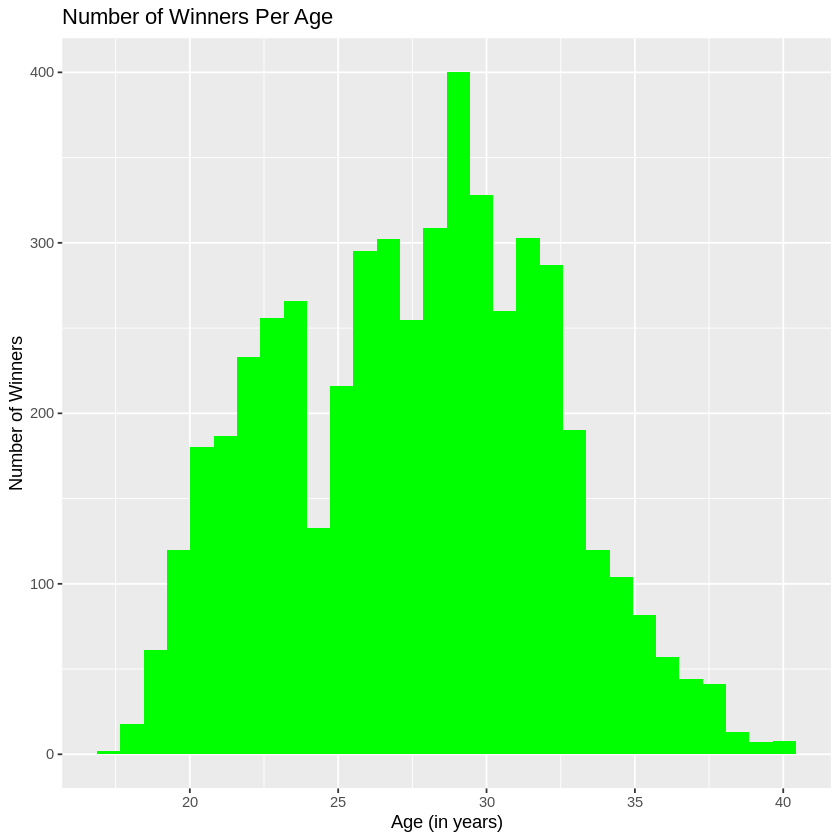

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 154 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


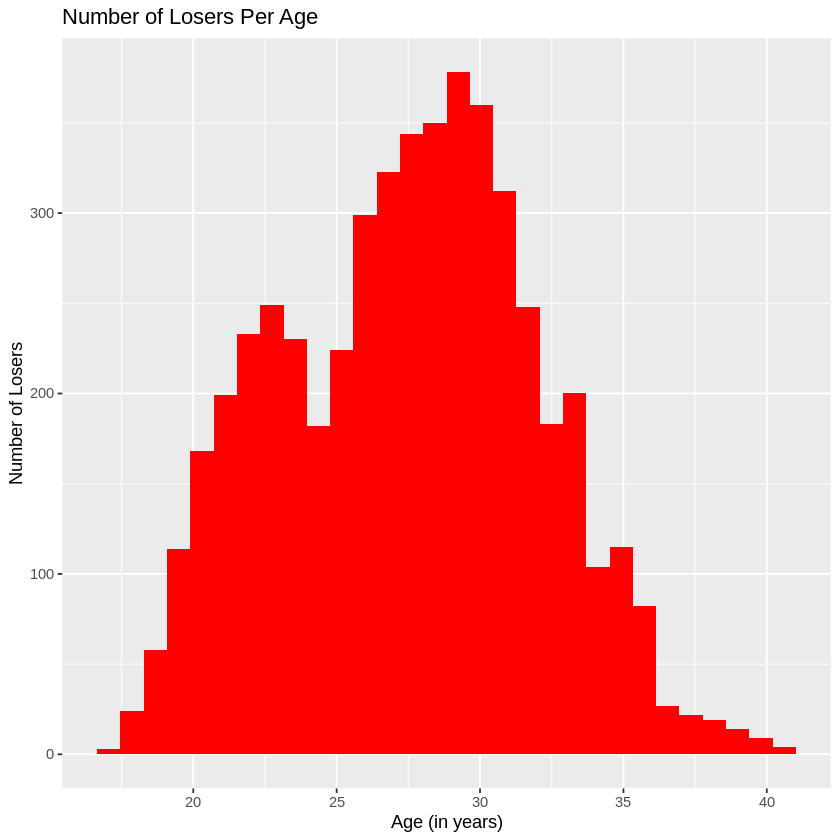

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 330 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


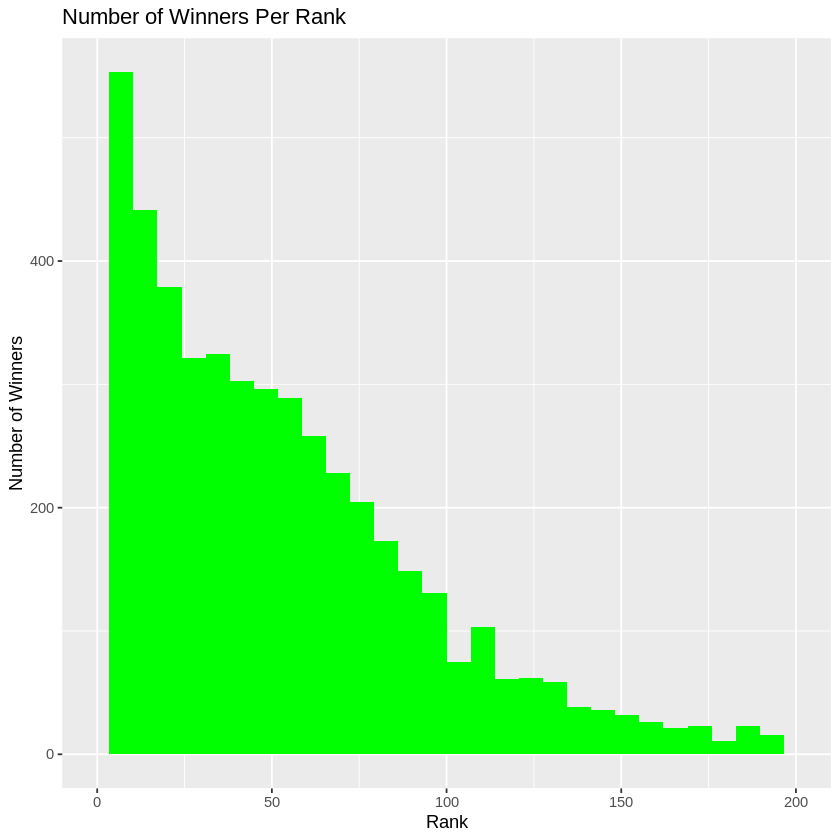

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 8 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


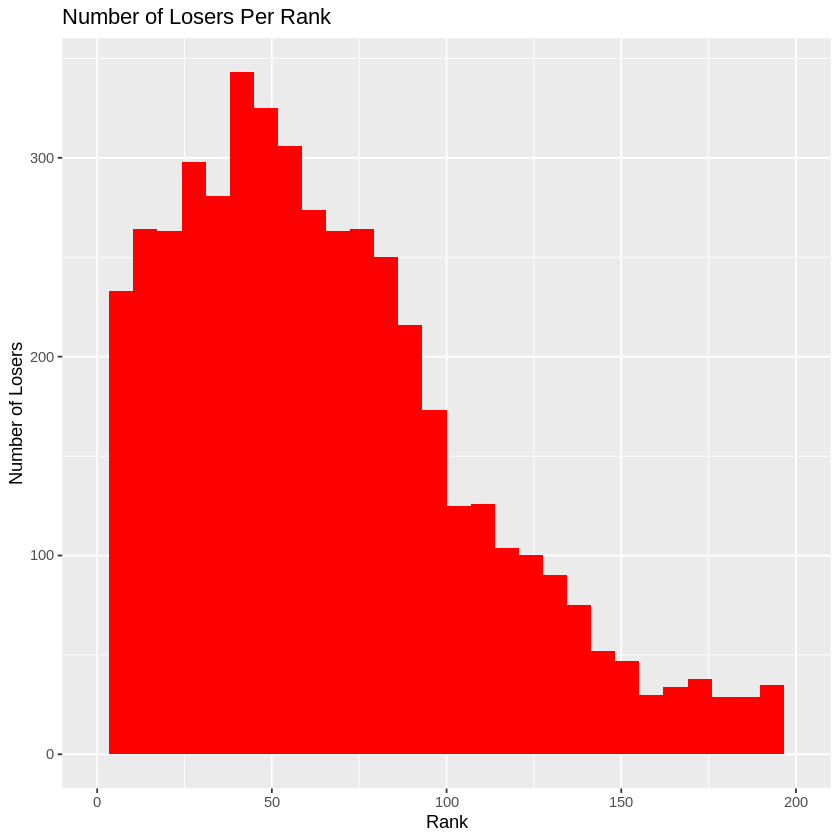

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


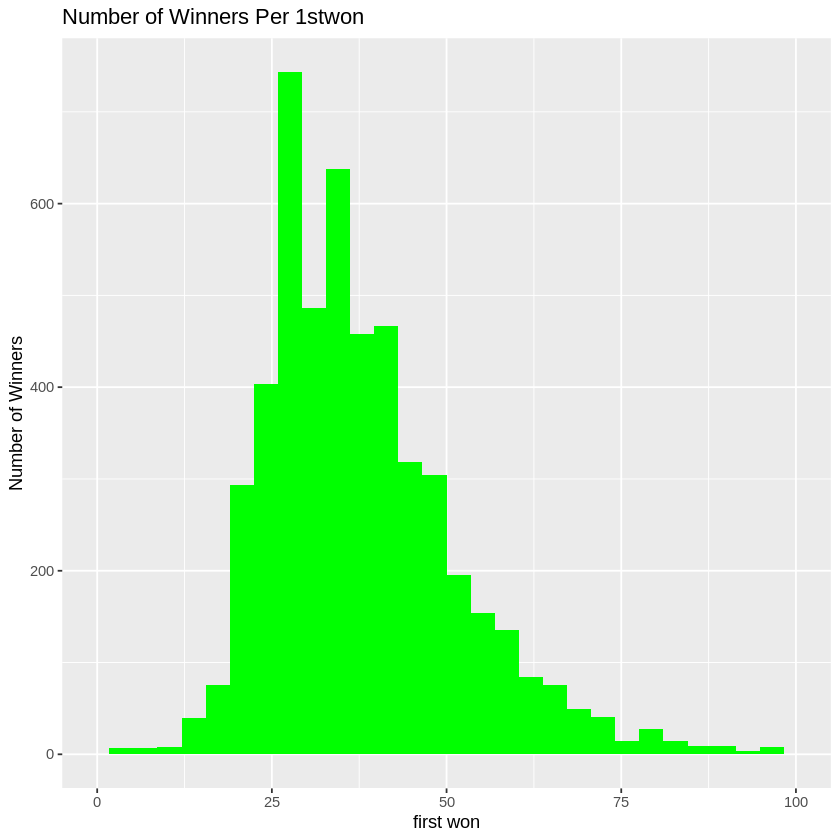

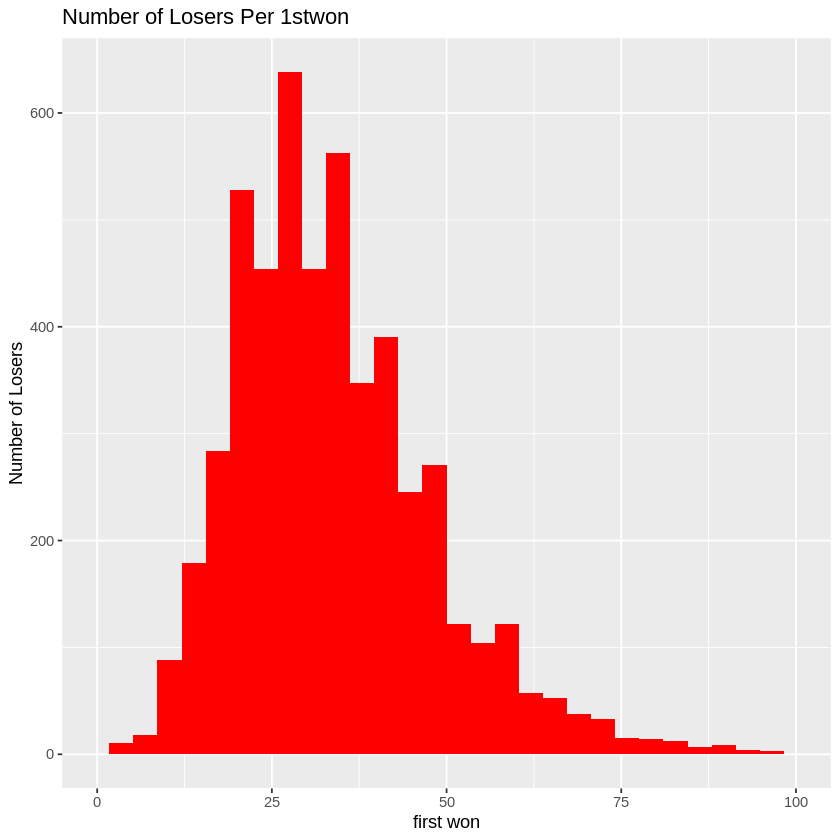

In [18]:
#Exploratory Data Visualization Code


#Predictor 1 (age) vs Result

atp_train_winners <- filter(atp_train, result == "winner")

winners_per_age <- ggplot(atp_train_winners, aes(x = age)) +
                   geom_histogram(fill = "green") +
                   labs(x = "Age (in years)", y = "Number of Winners") +
                   ggtitle("Number of Winners Per Age")
                   

winners_per_age

atp_train_losers <- filter(atp_train, result == "loser")


losers_per_age <-  ggplot(atp_train_losers, aes(x = age)) +
                   geom_histogram(fill = "red") +
                   labs(x = "Age (in years)", y = "Number of Losers") +
                   ggtitle("Number of Losers Per Age")
                   

losers_per_age


#Predictor 2 (Rank) vs Result

winners_per_rank <- ggplot(atp_train_winners, aes(x = rank)) +
                   geom_histogram(fill = "green") +
                   labs(x = "Rank", y = "Number of Winners") +
                   xlim(0,200) +
                   ggtitle("Number of Winners Per Rank")
                   

winners_per_rank


losers_per_age <-  ggplot(atp_train_losers, aes(x = rank)) +
                   geom_histogram(fill = "red") +
                   labs(x = "Rank", y = "Number of Losers") +
                   xlim(0,200) +
                   ggtitle("Number of Losers Per Rank")
                   

losers_per_age


#Predictor 3 (1st Won) vs Result

winners_per_stwon <- ggplot(atp_train_winners, aes(x = firstWon)) +
                   geom_histogram(fill = "green") +
                   labs(x = "first won", y = "Number of Winners") +
                   xlim(0,100) +
                   ggtitle("Number of Winners Per 1stwon")

winners_per_stwon


losers_per_stwon <- ggplot(atp_train_losers, aes(x = firstWon)) +
                   geom_histogram(fill = "red") +
                   labs(x = "first won", y = "Number of Losers") +
                   xlim(0,100) +
                   ggtitle("Number of Losers Per 1stwon")

losers_per_stwon


Methods:
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

Expected outcomes and significance:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?